In [1]:
import os
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv(r"C:\Users\singh_new\Downloads\amazon.csv\amazon.csv")

In [3]:
df.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# 1. Text Preprocessing

# 1.1 Normalizing Case Folding

In [4]:
df['Text'] = df['Text'].str.lower()
df.head()

,Text,label
0,this is the best apps acording to a bunch of ...,1
1,this is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1


# 1.2 Punctuations

In [5]:
df['Text'] = df['Text'].str.replace('[^\w\s]', '')
df.head()

,Text,label
0,this is the best apps acording to a bunch of ...,1
1,this is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1


# 1.3 Numbers

In [6]:
df['Text'] = df['Text'].str.replace('\d', '')
df.head()

,Text,label
0,this is the best apps acording to a bunch of ...,1
1,this is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1


# 1.4 Stopwords

In [7]:
sw = stopwords.words('english')
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [8]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

,Text,label
0,best apps acording bunch people agree bombs eg...,1
1,pretty good version game free. lots different ...,1
2,really . bunch levels find golden eggs. super ...,1
3,"silly game frustrating, lots fun definitely re...",1
4,terrific game pad. hrs fun. grandkids love it....,1


# 1.5 Rarewords

In [9]:
temp_df = pd.Series(' '.join(df['Text']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df.head()

,Text,label
0,best apps bunch people agree eggs pigs king pi...,1
1,pretty good version game free. lots different ...,1
2,really . bunch levels find golden eggs. super ...,1
3,"silly game frustrating, lots fun definitely re...",1
4,terrific game pad. hrs fun. grandkids love it....,1


# 1.6 Tokenization

In [10]:
df["Text"].apply(lambda x: TextBlob(x).words).head()

0    [best, apps, bunch, people, agree, eggs, pigs,...
1    [pretty, good, version, game, free, lots, diff...
2    [really, bunch, levels, find, golden, eggs, su...
3    [silly, game, frustrating, lots, fun, definite...
4    [terrific, game, pad, hrs, fun, grandkids, lov...
Name: Text, dtype: object

# 1.7 Lemmatization

In [11]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,Text,label
0,best apps bunch people agree egg pig king pig ...,1
1,pretty good version game free. lot different l...,1
2,really . bunch level find golden eggs. super fun.,1
3,"silly game frustrating, lot fun definitely rec...",1
4,terrific game pad. hr fun. grandkids love it. ...,1


In [12]:
df

,Text,label
0,best apps bunch people agree egg pig king pig ...,1
1,pretty good version game free. lot different l...,1
2,really . bunch level find golden eggs. super fun.,1
3,"silly game frustrating, lot fun definitely rec...",1
4,terrific game pad. hr fun. grandkids love it. ...,1
...,...,...
19991,app fricken froze kindle wont allow place igno...,0
19992,please add need neighbors! thanks awesome game...,1
19993,love it! game. awesome. wish free stuff house ...,1
19994,love love love app side fashion story fight wo...,1


# 2. Text Visualization

# 2.1 Calculation of Term Frequencies

In [17]:
tf = df["Text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,pig,39.00
1,best,953.00
2,apps,952.00
3,bunch,60.00
4,people,729.00


In [18]:
tf

,words,tf
0,pig,39.00
1,best,953.00
2,apps,952.00
3,bunch,60.00
4,people,729.00
...,...,...
12965,nieghbor,2.00
12966,story...,5.00
12967,tending,2.00
12968,teamlava.,2.00


In [19]:
tf.shape

(12970, 2)

In [20]:
tf["words"].nunique()

12970

In [21]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   12970.00
mean       24.87
std       142.41
min         2.00
5%          2.00
10%         2.00
25%         2.00
50%         4.00
75%        11.00
80%        15.00
90%        37.00
95%        78.00
99%       377.00
max      7629.00
Name: tf, dtype: float64

# 2.2 Barplot

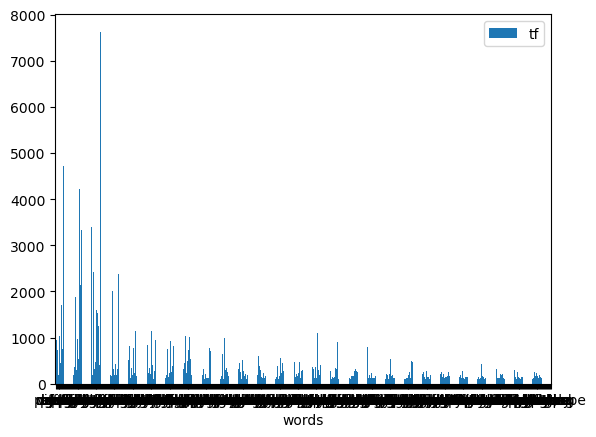

In [22]:
tf[tf["tf"] > 100].plot.bar(x="words", y="tf")
plt.xticks(rotation=0)
plt.show()

# 2.3 Wordcloud

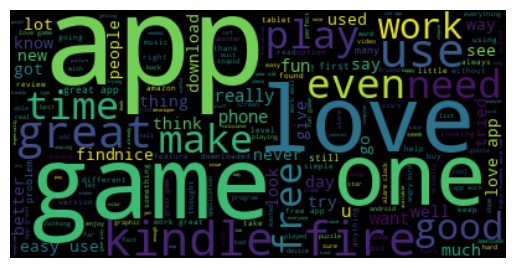

In [23]:
text = " ".join(i for i in df.Text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

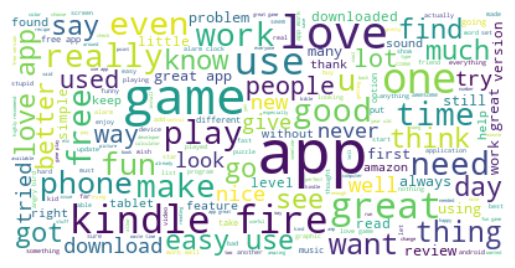

In [25]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=500,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 3. Sentiment Analysis

In [15]:
sia = SentimentIntensityAnalyzer()
df["polarity_score"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,Text,label,polarity_score
0,best apps bunch people agree egg pig king pig ...,1,0.77
1,pretty good version game free. lot different l...,1,0.93
2,really . bunch level find golden eggs. super fun.,1,0.80
3,"silly game frustrating, lot fun definitely rec...",1,0.84
4,terrific game pad. hr fun. grandkids love it. ...,1,0.96


In [16]:
df

,Text,label,polarity_score
0,best apps bunch people agree egg pig king pig ...,1,0.77
1,pretty good version game free. lot different l...,1,0.93
2,really . bunch level find golden eggs. super fun.,1,0.80
3,"silly game frustrating, lot fun definitely rec...",1,0.84
4,terrific game pad. hr fun. grandkids love it. ...,1,0.96
...,...,...,...
19991,app fricken froze kindle wont allow place igno...,0,-0.70
19992,please add need neighbors! thanks awesome game...,1,0.94
19993,love it! game. awesome. wish free stuff house ...,1,0.88
19994,love love love app side fashion story fight wo...,1,0.98


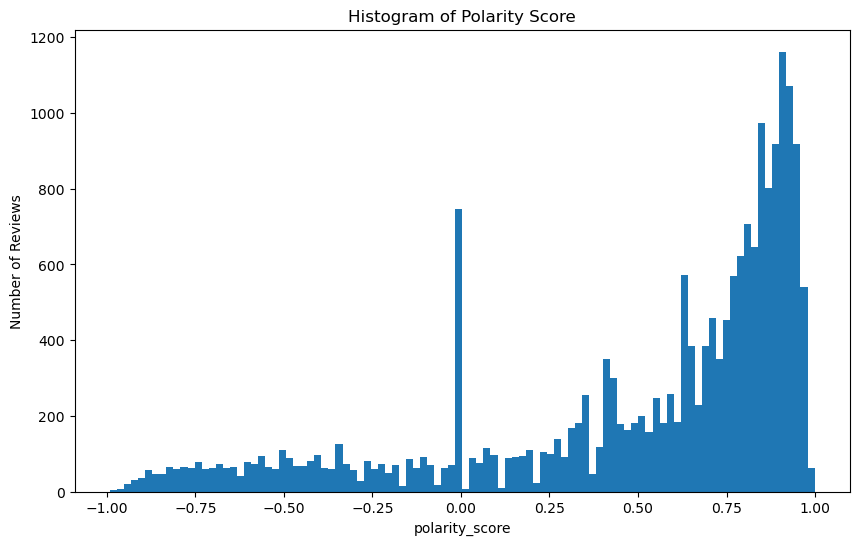

In [17]:
num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity_score, num_bins)
plt.xlabel('polarity_score')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

# 4. Sentiment Modeling

# 4.1 Creating Target

In [18]:
df["sentiment_label"] = df["Text"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,Text,label,polarity_score,sentiment_label
0,best apps bunch people agree egg pig king pig ...,1,0.77,pos
1,pretty good version game free. lot different l...,1,0.93,pos
2,really . bunch level find golden eggs. super fun.,1,0.80,pos
3,"silly game frustrating, lot fun definitely rec...",1,0.84,pos
4,terrific game pad. hr fun. grandkids love it. ...,1,0.96,pos


In [19]:
df

,Text,label,polarity_score,sentiment_label
0,best apps bunch people agree egg pig king pig ...,1,0.77,pos
1,pretty good version game free. lot different l...,1,0.93,pos
2,really . bunch level find golden eggs. super fun.,1,0.80,pos
3,"silly game frustrating, lot fun definitely rec...",1,0.84,pos
4,terrific game pad. hr fun. grandkids love it. ...,1,0.96,pos
...,...,...,...,...
19991,app fricken froze kindle wont allow place igno...,0,-0.70,neg
19992,please add need neighbors! thanks awesome game...,1,0.94,pos
19993,love it! game. awesome. wish free stuff house ...,1,0.88,pos
19994,love love love app side fashion story fight wo...,1,0.98,pos


In [36]:
df["sentiment_label"].value_counts()

sentiment_label
pos    16230
neg     3766
Name: count, dtype: int64

In [39]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["Text"]
y = df["sentiment_label"]

# 4.2 Count Vectors

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# word 
vectorizer_c = CountVectorizer()
X_c = vectorizer_c.fit_transform(X)
#vectorizer_c.get_feature_names()

In [43]:
X_c.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 4.3 TF-IDF

In [45]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
tf_idf_word_vectorizer.get_feature_names_out()
X_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)
#tf_idf_ngram_vectorizer.get_feature_names()
X_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 5. Train Modeling 

# Features Extraction and split the data(train and test set)

In [22]:
from sklearn.model_selection import train_test_split

x = df['Text']
y = df['sentiment_label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

# Vectorization of the text data

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)
x_test_counts = vectorizer.transform(x_test)

In [24]:
#Train Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_counts, y_train)

MultinomialNB()

# Make Predictions and check the accuracy of the model

In [26]:
#Make predictions using Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, classification_report


y_pred_nb = nb_classifier.predict(x_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy: ", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy:  0.88175
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         neg       0.71      0.66      0.69       778
         pos       0.92      0.93      0.93      3222

    accuracy                           0.88      4000
   macro avg       0.81      0.80      0.81      4000
weighted avg       0.88      0.88      0.88      4000



In [27]:
#Train Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [28]:
#Make predictions using Random Forest Classifier

y_pred_rf = rf_classifier.predict(x_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.87375
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         neg       0.83      0.44      0.57       778
         pos       0.88      0.98      0.93      3222

    accuracy                           0.87      4000
   macro avg       0.86      0.71      0.75      4000
weighted avg       0.87      0.87      0.86      4000

